# Market Sentiments

In [1]:
%pip install pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 21.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.9/245.9 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 2.9 MB/s eta 0:00:00
  Using cached pillow-10.4.0-cp311-cp311-macosx_11_0_arm64.whl (3.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 16.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sentiments = pd.read_excel("sentiments.xlsx", sheet_name='2020 - 2024')
sentiments['Date'] = sentiments['Date'].str.slice(0, 10)

## Time Analysis

In [37]:
sentiments['Date'] = pd.to_datetime(sentiments['Date'])

### Average Rating Per Day

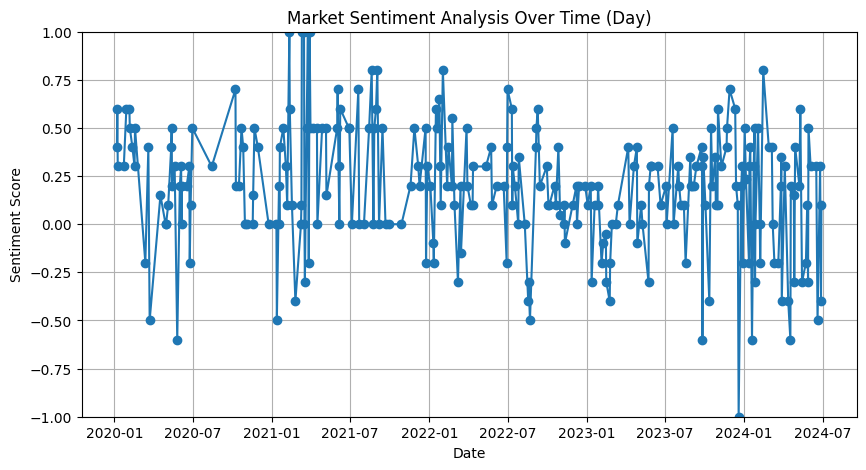

In [38]:
sentiments_day = sentiments.groupby('Date').agg({'Rating': 'mean'}).reset_index()

plt.figure(figsize=(10, 5))
plt.plot(sentiments_day['Date'], sentiments_day['Rating'], marker='o')

plt.title('Market Sentiment Analysis Over Time (Day)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.ylim(-1, 1)
plt.grid(True)

plt.show()


### Average Rating Per Month

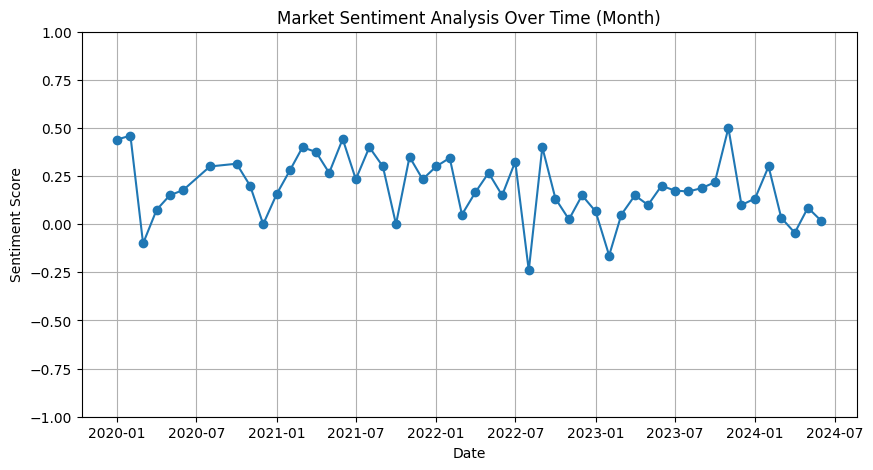

In [46]:
sentiments['Year Month'] = sentiments['Date'].dt.to_period('M')
sentiments_month = sentiments.groupby('Year Month').agg({'Rating': 'mean'}).reset_index()
sentiments_month['Year Month'] = sentiments_month['Year Month'].dt.to_timestamp()

plt.figure(figsize=(10, 5))
plt.plot(sentiments_month['Year Month'], sentiments_month['Rating'], marker='o')

plt.title('Market Sentiment Analysis Over Time (Month)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.ylim(-1, 1)
plt.grid(True)

plt.show()

In [45]:
sentiments_month

,Year Month,Rating
0,2020-01,0.440000
1,2020-02,0.460000
2,2020-03,-0.100000
3,2020-04,0.075000
4,2020-05,0.150000
5,2020-06,0.177778
6,2020-08,0.300000
7,2020-10,0.314286
8,2020-11,0.200000
9,2020-12,0.000000
